In [1]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import passenger

%reload_ext autoreload

In [2]:
fastq_path = "../nextflow/data/passenger/tiago-processed/AV_IgYKSTOP_11A_collapse-unique.fastq.gz"
blast_path = "passenger-blast/AV_IgYKSTOP_11A_collapse-unique.atleast2.blast.tsv"
prefix = "11a"
mut_freq_name = prefix+"_mut_freq"
chigy = passenger.CHIGY_LC
max_mutation_count = 10
max_n_count = 10
# 2 or 3 gap segments, which corresponds to 0 or 1 indels
allowable_gap_segment_counts = [2, 3]

In [3]:
passenger.test_summarize_alignment()
passenger.test_correct_alignment()
passenger.test_summarize_alignment()
passenger.test_compute_mutation_counts_by_base()

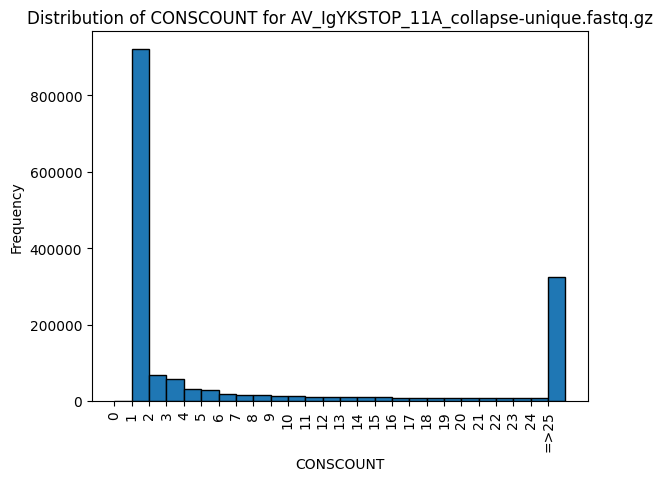

In [4]:
passenger.umi_histogram(fastq_path, 25)


In [5]:
blast_df = passenger.blast_df_of_blast_files([blast_path])

processed_stop_df = chigy.processed_stop_df_of_blast_df(blast_df)
processed_stop_df

,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
0,TTAAGGAGAATTGTGGA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,78,97,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[44, 90, 133, 161, 268, 269]","[T, T, G, C, T, C]",[],6,0,0
1,TACTAAACTAGAGGCCG|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,46,65,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCA...,2,True,[69],[G],[],1,0,1
2,GAAAGATATTGTTTAAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,77,96,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGA...,2,True,"[66, 91, 234, 255]","[C, A, G, A]",[],4,0,2
3,AGGGCCGGAAACGGAAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,61,80,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,5,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...",[321],64,1,3
4,AAGTAACAAAAAAAAAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,61,80,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,CAAACCATACAANATACCATCTAACATAGACGCCCGCCTCCACCAT...,2,True,[],[],[],0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127984,GTGAATATAATTAAGAT|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,37,55,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGG...,2,True,[],[],[],0,0,127984
127987,CCAAAGGGTTTTTCATT|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,61,79,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,3,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...",[],87,0,127987
127988,AAAATAAAAAAAAGACA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,78,96,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,TACATACCAGTACACTAACATTCATAATCTATACCANCTCTCATAG...,2,True,"[166, 309]","[A, T]",[],2,0,127988
127990,AAGACCAAGGACCGGAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,37,55,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGT...,2,True,"[251, 277]","[T, A]",[],2,0,127990


In [6]:
chigy.pretty_print_alignments(processed_stop_df.head())

> AV_IgYKSTOP_11A_collapse-unique 0
-----------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                           ||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||..||||||||||||||||||||||||||||||||||||||||||||||||||||          
GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTT

In [7]:
# Group by 'dataset' and count the number of rows in each group
row_counts_by_dataset = processed_stop_df.groupby('dataset').size()

# Print the count of rows for each 'dataset'
print(row_counts_by_dataset)


dataset
AV_IgYKSTOP_11A_collapse-unique    77006
dtype: int64


In [8]:
processed_stop_df["mutation_count"].value_counts()[:20].sort_index()

mutation_count
0      5093
1     12457
2     19562
3     12070
4      6599
5      3444
6      1721
7       897
8       424
9       248
65      238
85      293
86      471
87      630
88      815
89     1259
90     1444
91     1142
92      695
93      344
Name: count, dtype: int64

In [9]:
chigy_believable = processed_stop_df[(processed_stop_df["mutation_count"] < max_mutation_count) & (processed_stop_df["n_count"] < max_n_count) & (processed_stop_df["bookended_by_gaps"] == True)].copy()

chigy_believable


,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
0,TTAAGGAGAATTGTGGA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,78,97,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[44, 90, 133, 161, 268, 269]","[T, T, G, C, T, C]",[],6,0,0
1,TACTAAACTAGAGGCCG|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,46,65,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCA...,2,True,[69],[G],[],1,0,1
2,GAAAGATATTGTTTAAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,77,96,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,GGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGA...,2,True,"[66, 91, 234, 255]","[C, A, G, A]",[],4,0,2
4,AAGTAACAAAAAAAAAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,61,80,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,CAAACCATACAANATACCATCTAACATAGACGCCCGCCTCCACCAT...,2,True,[],[],[],0,0,4
5,GCTATAGCTCTTCTAGA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,36,55,0.000899,...,AV_IgYKSTOP_11A_collapse-unique,AGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGTG...,2,True,"[308, 314]","[A, G]",[],2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,GTTAACAGCTGCGAGAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,60,78,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,GAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATG...,2,True,"[319, 321]","[T, G]",[],2,0,127976
127984,GTGAATATAATTAAGAT|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,37,55,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGG...,2,True,[],[],[],0,0,127984
127988,AAAATAAAAAAAAGACA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,78,96,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,TACATACCAGTACACTAACATTCATAATCTATACCANCTCTCATAG...,2,True,"[166, 309]","[A, T]",[],2,0,127988
127990,AAGACCAAGGACCGGAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,37,55,53.000000,...,AV_IgYKSTOP_11A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGT...,2,True,"[251, 277]","[T, A]",[],2,0,127990


In [10]:
# Find representatives of the various gap counts
representative_gap_counts = chigy_believable.drop_duplicates(subset=["gap_segment_count"])
representative_gap_counts = representative_gap_counts.sort_values(by=["gap_segment_count"])
chigy.pretty_print_alignments(representative_gap_counts)

> AV_IgYKSTOP_11A_collapse-unique 0
-----------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                           ||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||..||||||||||||||||||||||||||||||||||||||||||||||||||||          
GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTT

In [11]:
chigy_believable = chigy_believable[chigy_believable["gap_segment_count"].isin(allowable_gap_segment_counts)]
chigy_believable["mutation_count"].value_counts().sort_index()

mutation_count
0     5032
1    12296
2    19236
3    11783
4     6405
5     3270
6     1613
7      811
8      382
9      191
Name: count, dtype: int64

In [12]:
# Find representatives of the various gap counts
representative_mutation_counts = chigy_believable.drop_duplicates(subset=["mutation_count"])
representative_mutation_counts = representative_mutation_counts.sort_values(by=["mutation_count"])
chigy.pretty_print_alignments(representative_mutation_counts)

> AV_IgYKSTOP_11A_collapse-unique 4
------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                          ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||          
CAAACCATACAANATACCATCTAACATAGACGCCCGCCTCCACCATGGAGTCACAGACTCAGGTCTTTGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAAT

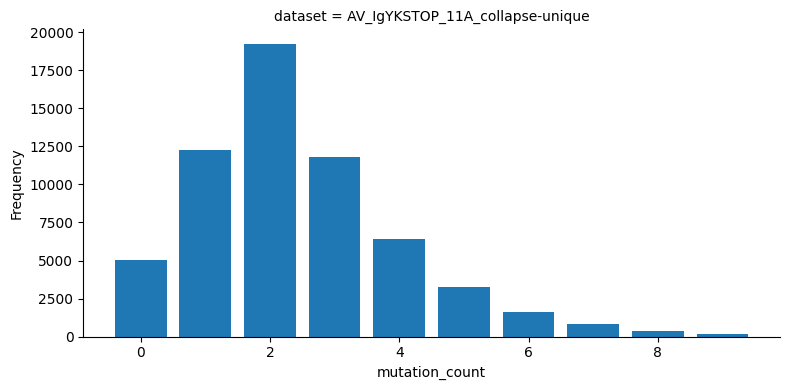

In [13]:
passenger.make_mutation_histogram(chigy_believable)

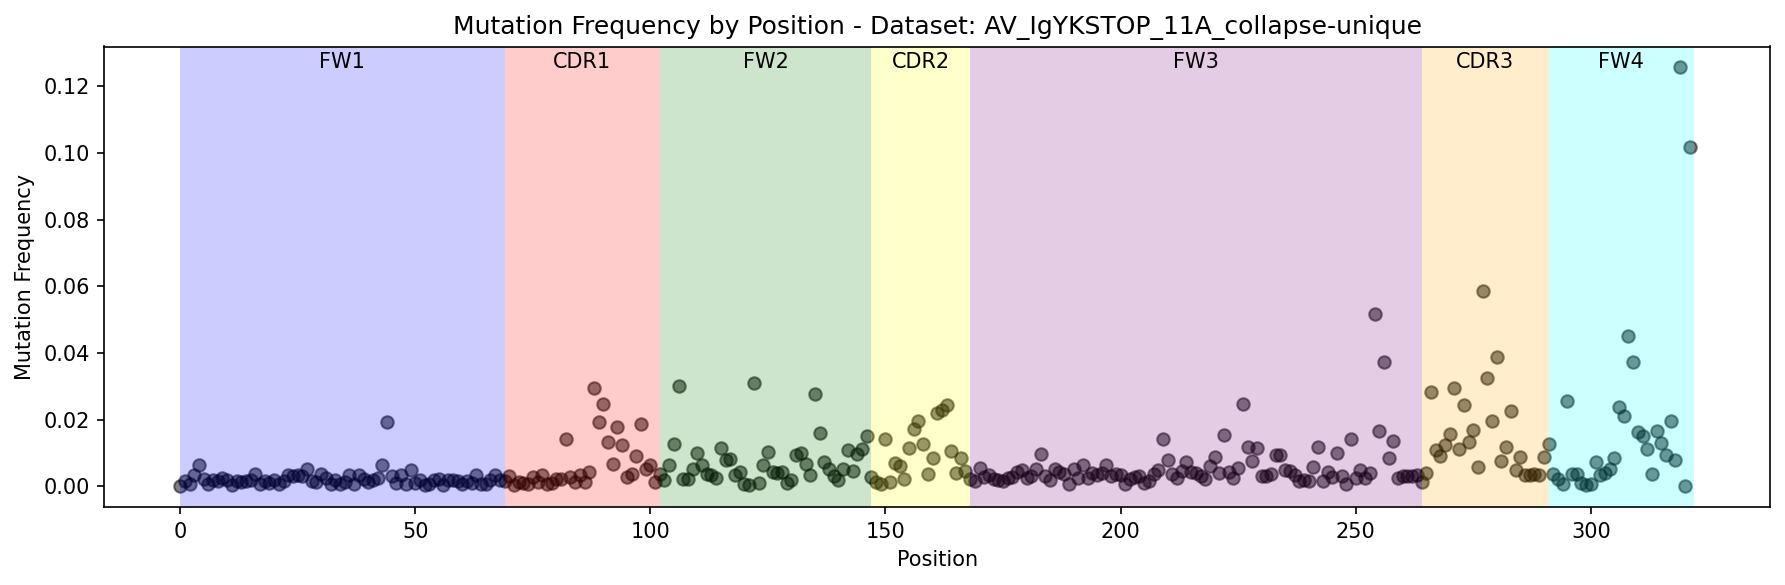

In [14]:
chigy.make_mutation_rate_plot(chigy_believable)


In [15]:
counts_by_base = passenger.compute_mutation_counts_by_base(chigy_believable, chigy.chigy_stop_trimmed)

counts_by_base.to_csv(prefix+"_counts_by_base.csv")

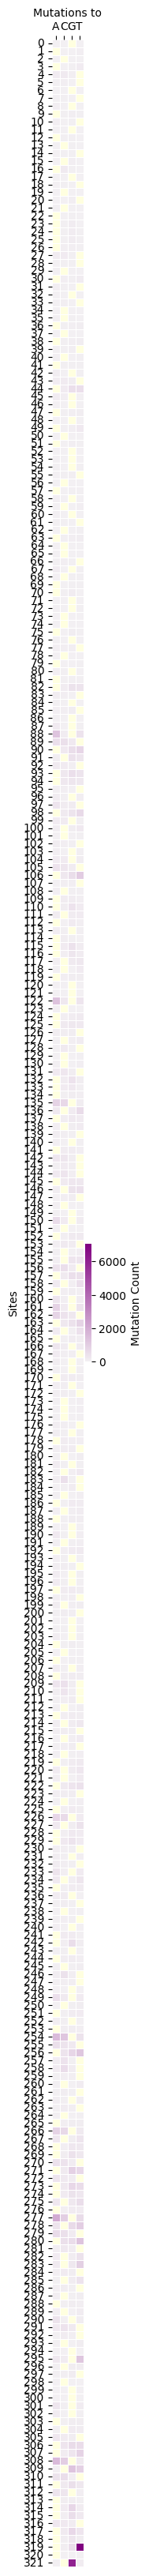

In [16]:
passenger.create_mutation_heatmap(counts_by_base)

In [17]:
counts_by_base.iloc[319]

A      -1
C      91
G     546
T    7033
Name: 319, dtype: int64

In [18]:
chigy_believable["sequence"].str[-20:].value_counts()


sequence
GAAATAAAACGGGCTGATGC    42439
GAAATAATACGGGCTGATGC     4373
GAAATAAAAGGGGCTGATGC     3543
GAAATAATAGGGGCTGATGC     1240
GAAATAANACGGGCTGATGC      675
                        ...  
GAAATAAAACGACCTGATGC        1
GATATAAAACGGACTGATGC        1
GAAATAAAANGGGNTGATGN        1
GAAATAANACGGGCTGATGT        1
GAAATTATATGGGCTGATGC        1
Name: count, Length: 501, dtype: int64

In [23]:
n_counts = passenger.compute_thing_counts(chigy_believable, "n_positions")
n_series = pd.DataFrame({"count of Ns": n_counts, "n_freq": n_counts/len(chigy_believable)}).sort_values(by="count of Ns", ascending=False)
# set the index name of n_series to be "site"
n_series.index.name = "site"
n_series.head(10)

,count of Ns,n_freq
site,,
319,2062,0.033793
321,1927,0.031580
295,1209,0.019814
307,618,0.010128
306,270,0.004425
16,171,0.002802
49,142,0.002327
230,82,0.001344
296,75,0.001229


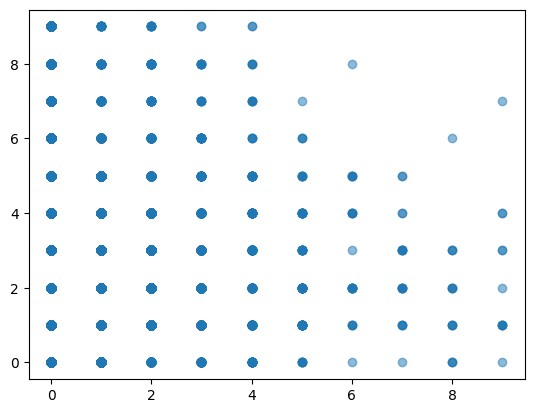

In [20]:
# make a scatter plot of chigy_believable["n_count"] versus chigy_believable["mutation_count"]
plt.scatter(chigy_believable["n_count"], chigy_believable["mutation_count"], alpha=0.5)

In [21]:
padded_seq = "NN" + chigy.chigy_stop_trimmed + "NN"

fivemers = [padded_seq[i:i+5] for i in range(len(padded_seq) - 4)]

pd.DataFrame({"fivemers": fivemers}).to_csv("fivemers.csv", index=False)

In [22]:
mutation_frequency_by_position = passenger.mutation_frequency_by_position_of(chigy_believable)
pd.DataFrame({mut_freq_name: mutation_frequency_by_position}).to_csv(mut_freq_name+".csv", index=False)